In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

pd.options.display.max_colwidth = None

In [2]:
recipes = pd.read_csv('Data/recipes_50k.csv')
recipes.drop(columns = 'Unnamed: 0', inplace = True)

In [4]:
interactions.info()

NameError: name 'interactions' is not defined

In [5]:
# loop to make nutrition into a list of integers so I can make them into their own columns

column_list = []

for x in range(len(recipes['nutrition'])):
    step_1 = recipes['nutrition'][x].replace('[', '')
    step_2 = step_1.replace(']', '')
    step_3 = step_2.split(', ')
    list_list = list(map(float, step_3))
    column_list.append(list_list)

recipes['nutrition'] = column_list

KeyError: 'nutrition'

In [6]:
nutrition = recipes[['nutrition']].copy()

KeyError: "None of [Index(['nutrition'], dtype='object')] are in the [columns]"

For the Nutrition Column the order is \[Calories, Total Fat, Sugar, Sodium, Protein, Saturated Fat\]

In [ ]:
# calories
cal_list = []

for x in range(len(nutrition)):
    cal_list.append(nutrition['nutrition'][x][0])

nutrition['calories'] = cal_list

# total fat
fat_list = []

for x in range(len(nutrition)):
    fat_list.append(nutrition['nutrition'][x][1])

nutrition['tot_fat'] = fat_list

# sugar
sugar_list = []

for x in range(len(nutrition)):
    sugar_list.append(nutrition['nutrition'][x][2])

nutrition['sugar'] = sugar_list

# sodium
cal_list = []

for x in range(len(nutrition)):
    cal_list.append(nutrition['nutrition'][x][3])

nutrition['sodium'] = cal_list

# protein
protein_list = []

for x in range(len(nutrition)):
    protein_list.append(nutrition['nutrition'][x][4])

nutrition['protein'] = protein_list

# saturated fat
sat_fat_list = []

for x in range(len(nutrition)):
    sat_fat_list.append(nutrition['nutrition'][x][5])

nutrition['sat_fat'] = sat_fat_list

nutrition.drop(columns = 'nutrition', inplace = True)

In [ ]:
# this is a seperated DataFrame for the recipes in each column
nutrition

In [ ]:
# nutrition.to_csv('Data/nutrition_clean.csv')

In [ ]:
recipes_nutrition = pd.concat([recipes, nutrition], axis = 1)

In [ ]:
recipes_nutrition.drop(columns = ['nutrition', 'submitted', 'contributor_id'], inplace = True)

In [ ]:
# recipes_nutrition.to_csv('Data/recipes_nutrition.csv')

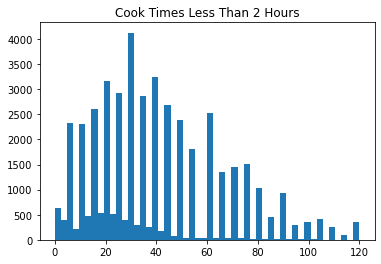

In [7]:
# there were some wild outliers messing with the actual timing of the data.  Will be removing said outliers.
plt.title(label = 'Cook Times Less Than 2 Hours')
plt.hist(recipes[recipes['minutes'] <= 120]['minutes'], bins = 50);

In [8]:
recipes_nutrition_time = recipes[recipes['minutes'] <= 540].copy()

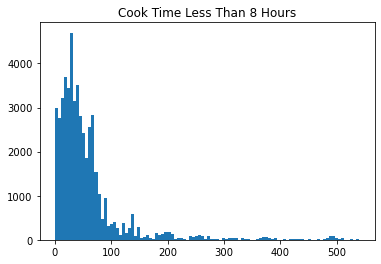

In [9]:
plt.title('Cook Time Less Than 8 Hours')
plt.hist(recipes_nutrition_time['minutes'], bins = 100, label = 'Cook Times Less Than 8 Hours');

In [10]:
recipes[recipes['minutes'] <= 400]['minutes'].describe()

count    49507.000000
mean        52.836569
std         53.949417
min          0.000000
25%         20.000000
50%         40.000000
75%         65.000000
max        400.000000
Name: minutes, dtype: float64

https://www.datacamp.com/community/tutorials/recommender-systems-python

In [11]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           50000 non-null  object 
 1   id             50000 non-null  int64  
 2   minutes        50000 non-null  int64  
 3   tags           50000 non-null  object 
 4   n_steps        50000 non-null  int64  
 5   steps          50000 non-null  object 
 6   description    50000 non-null  object 
 7   ingredients    50000 non-null  object 
 8   n_ingredients  50000 non-null  int64  
 9   calories       50000 non-null  float64
 10  tot_fat        50000 non-null  float64
 11  sugar          50000 non-null  float64
 12  sodium         50000 non-null  float64
 13  protein        50000 non-null  float64
 14  sat_fat        50000 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 5.7+ MB


In [12]:
descriptions = recipes[['description', 'name']].copy()


descriptions.dropna(inplace = True)
recipes.dropna(inplace = True)

In [13]:
tfidf = TfidfVectorizer(stop_words='english')

desc_matrix = tfidf.fit_transform(descriptions['description'][:30_000])

desc_matrix[1]

<1x24260 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [14]:
cosine_sim2 = cosine_similarity(desc_matrix[:30_000], desc_matrix[:30_000])

In [15]:
new_desc = pd.Series(descriptions.index[:30_000], index = descriptions['name'][:30_000]).drop_duplicates()

In [16]:
def get_recommendations(title, cosine_sim2):
    idx = new_desc[title]
    
    sim_scores = list(enumerate(cosine_sim2[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    
    sim_scores = sim_scores[1]
    
    return pd.DataFrame(recipes.iloc[sim_scores[0]])

In [25]:
get_recommendations('bacon soup with veggies', cosine_sim2)

,3275
name,all american cheeseburger chowder
id,181017
minutes,45
tags,"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'preparation', 'soups-stews', 'beef', 'easy', 'chowders', 'dietary', 'low-calorie', 'low-carb', 'ground-beef', 'low-in-something', 'meat', '3-steps-or-less']"
n_steps,10
steps,"['in a large saucepan , brown beef and bacon', 'drain if necessary', 'stir in potatoes , onion , celery , green pepper , salt and water', 'cover and cook until vegetables are tender , about 15-20 minutes', 'whisk together flour with 1 / 2 cup of the milk', 'add to saucepan along with remaining milk', 'cook and stir until thickened and bubbly', 'add cheese', 'heat and stir until cheese is melted', 'garnish with additional cheese and sliced scallions , if desired']"
description,great cold weather soup.
ingredients,"['extra lean ground beef', 'bacon', 'potatoes', 'onion', 'celery', 'green bell pepper', 'salt', 'water', 'reduced-fat milk', 'unbleached all-purpose flour', 'cheddar cheese']"
n_ingredients,11
calories,392
